In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential  # Build NN
from tensorflow.keras.layers import Dense  # creating layers

In [2]:
# lets read a file
df= pd.read_csv("green_tech_data.csv")
df.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
#seperate X and Y
# but X has to be in array.
# Y has to be 1D array and there will be only 1 op column
x= df.iloc[:, 0:-1 ].values
x

# [:,0:-1] here  : stands for all rows and 0:-1 used to fetch 0th column to last column but last column
# will be excluded.

# .values is a property to convert your data into array.


array([[1.81089042e+02, 1.28286267e+02, 6.42031646e-01, 7.32567745e-01],
       [3.82750007e+02, 6.72769370e+02, 8.41399650e-02, 2.89109584e+00],
       [3.06197880e+02, 3.82920383e+02, 1.61628714e-01, 2.93285805e+00],
       [2.59530469e+02, 5.57713622e+02, 8.98554189e-01, 3.36843456e+00],
       [1.04606524e+02, 9.16809827e+02, 6.06429060e-01, 3.76741100e+00],
       [1.04598082e+02, 3.24363006e+02, 9.19705162e-03, 4.89133436e+00],
       [7.03292643e+01, 4.69344631e+02, 1.01471543e-01, 2.82335157e+00],
       [3.53161651e+02, 7.79996025e+02, 6.63501769e-01, 1.95330413e+00],
       [2.60390254e+02, 3.05918349e+02, 5.06158385e-03, 4.07833788e+00],
       [2.97825402e+02, 1.69281919e+02, 1.60808051e-01, 1.71874513e+00],
       [5.72045730e+01, 3.60776308e+02, 5.48733789e-01, 2.47537139e+00],
       [3.89468448e+02, 2.45099159e+02, 6.91895198e-01, 8.53053716e-01],
       [3.41354924e+02, 9.36727887e+02, 6.51961260e-01, 6.14078345e-01],
       [1.24318689e+02, 8.27308342e+02, 2.24269309e

In [ ]:
y= df["sustainability"].values
y

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-3.23112154e-01, -1.59922959e+00,  4.26196271e-01,
        -1.50512126e+00],
       [ 1.62343393e+00,  4.75167094e-01, -1.48468335e+00,
         1.37699554e-01],
       [ 8.84509348e-01, -6.29112862e-01, -1.21927041e+00,
         1.69484093e-01],
       [ 4.34049022e-01,  3.68224313e-02,  1.30483224e+00,
         5.00994328e-01],
       [-1.06136481e+00,  1.40492361e+00,  3.04250992e-01,
         8.04648847e-01],
       [-1.06144630e+00, -8.52207440e-01, -1.74137635e+00,
         1.66004873e+00],
       [-1.39222838e+00, -2.99849802e-01, -1.42531957e+00,
         8.61404823e-02],
       [ 1.33783032e+00,  8.83684116e-01,  4.99735314e-01,
        -5.76038550e-01],
       [ 4.42348151e-01, -9.22478740e-01, -1.75554107e+00,
         1.04129026e+00],
       [ 8.03693445e-01, -1.44304247e+00, -1.22208133e+00,
        -7.54557609e-01],
       [-1.51891535e+00, -7.13478375e-01,  1.06634285e-01,
        -1.78701599e-01],
       [ 1.68828413e+00, -1.15419048e+00,  5.96987928e-01,
      

In [ ]:
# split a data into trainig and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
# lets build ANN model

# init a model
ann = Sequential()

# create and add Hidden layer
ann.add(Dense(units=8, activation="relu"))  #HL
ann.add(Dense(units=16, activation="relu"))  #HL

#lets create op layer
ann.add(Dense(units=1, activation="sigmoid"))  #op  # for multiclassification keep softmax as

#for binary classification keep units to 1
#for example if output column has two unique values -: YES ,NO then keep units =1

# for multiclassification keep units to number of unique values in output column
# for example if output column has three unique values -: YES ,NO, MAYBE then keep the units =3

In [ ]:
# writing code for optimization
ann.compile("adam",loss='binary_crossentropy',metrics=['accuracy'])

# keep loss to "sparse_categorical_crossentropy" for multi classification if it geenrates
#error then keep categorical_crossentropy

In [ ]:
#train a model
ann.fit(xtrain,ytrain,epochs=20, batch_size=32)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6359 - loss: 0.6600
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6641 - loss: 0.6598 
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6664 - loss: 0.6417 
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7141 - loss: 0.6283 
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7516 - loss: 0.6007 
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7539 - loss: 0.5978 
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7547 - loss: 0.5916 
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7648 - loss: 0.5765 
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7508 - loss: 0.5687 
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7945 - loss: 0.5494 
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7789 - loss: 0.5464 
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8320 - loss: 0.5256 
Ep

In [ ]:
# predicting xtest but ans wont be mentioned in 0 and 1. ouput of this code
# will be the ans produced by sigmoid function.
# we need to setup threshold later on.
ypred=ann.predict(xtest)
ypred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[9.5204268e-06],
       [4.8589414e-01],
       [4.8589414e-01],
       [4.8589414e-01],
       [4.8589414e-01],
       [2.8762897e-03],
       [4.8589414e-01],
       [4.8589414e-01],
       [4.5950543e-02],
       [4.8589414e-01],
       [9.0575414e-03],
       [4.8589414e-01],
       [4.8589414e-01],
       [4.8589414e-01],
       [4.8589414e-01],
       [3.5905003e-05],
       [4.8589411e-01],
       [2.5827564e-02],
       [4.8589411e-01],
       [4.8589411e-01]], dtype=float32)

In [ ]:
# setting up threshold to classify it into 0 and 1
final_pred=np.where(ypred>0.5,1,0)
final_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
# predicting user defined data
ann.predict(np.array([[306.197880,382.920383,0.161629,2.932858]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.4858941]], dtype=float32)

In [ ]:


# Training history
history = ann.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_data=(xtest, ytest))




Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8547 - loss: 0.6142 - val_accuracy: 0.8500 - val_loss: 0.5862
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8430 - loss: 0.6048 - val_accuracy: 0.8500 - val_loss: 0.5857
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8625 - loss: 0.5954 - val_accuracy: 0.8500 - val_loss: 0.5858
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8586 - loss: 0.6051 - val_accuracy: 0.8500 - val_loss: 0.5870
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8781 - loss: 0.5915 - val_accuracy: 0.8500 - val_loss: 0.5878
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8508 - loss: 0.6020 - val_accuracy: 0.8500 - val_loss: 0.5883
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8508 - loss: 0.6086 - val_accuracy: 0.8500 - val_loss: 0.5879
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8586 - loss: 0.5969 - val_accuracy: 0.8500 - val_loss: 0.5848


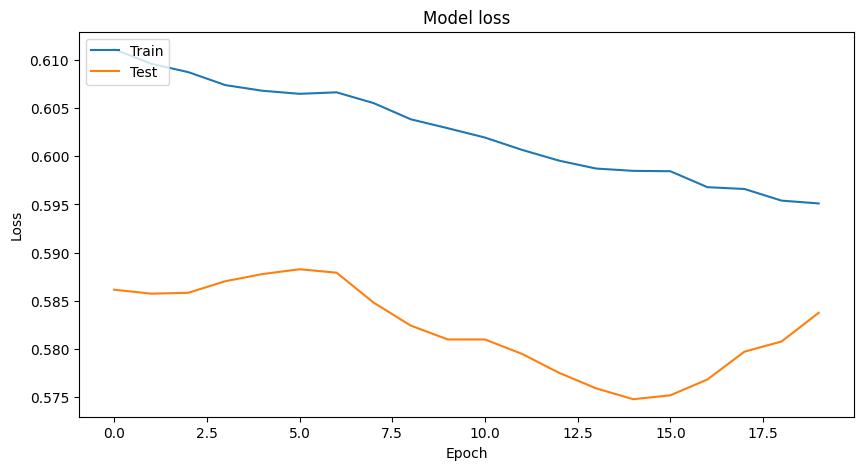

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])   #training loss
plt.plot(history.history['val_loss']) #validation
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
ypred[0]

In [ ]:
final_ypred = np.argmax(ypred, axis=1)
final_pred
